In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd Tolman-Eichenbaum Machine


/content/gdrive/My Drive/Tolman-Eichenbaum Machine


In [ ]:
%cd gdrive/MyDrive/plot_TEM_results/square_results


/content/gdrive/MyDrive/plot_TEM_results/square_results


In [ ]:
! ls


In [ ]:
def get_path(run, date, save_dirs, recent=-1):
    for save_dir in save_dirs:
        try:
            save_path = save_dir + date + '/run' + str(run) + '/save'
            list_of_files = listdir(save_path)
            print('yes' + save_path)

            list_of_files_1 = [x for x in list_of_files if 'link' not in x]

            #a = [int(x.split('.')[0].split('_')[-1]) for x in list_of_files_1 if 'par' not in x and '.npy' in x] 
            a = [int(x.split('.')[0].split('_')[-1]) for x in list_of_files_1 if 'par' not in x and 'markers' not in  x and '.npy' in x] #yanis
            a.sort()

            index = str(np.unique(a)[recent])
            print(index, len(np.unique(a)))

            return save_path, index, list_of_files
        except FileNotFoundError:
            save_path = save_dir + date + '/run' + str(run) + '/save'
            print('not ' + save_path)
            pass

    raise ValueError('FILE NOT FOUND')


yes../../Summaries/2020-11-26/run1_line_ti/save


['params.npy', 'markers.npy']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
#sys.path.insert(0, 'model_files/')
sys.path.insert(0, '../../TEM Machine/generalising-structural-knowledge/')
from plotting_functions import *
from arb_functions import *
from helper_functions import *
from behaviour_analyses import *
from environment_functions import *

save_dirs = ['../../Summaries/']

date = '2020-11-30'
run = '0_square'

recent = -1
data, para, list_of_files, save_path = get_data(save_dirs, run, date, recent)

A_RNN, g2g, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, shinys, adj, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

shinys_, masks, g_lim, p_lim = sort_data(g_all, p_all, shinys, widths, mult, smoothing, params, batch_id, \
                                         g_max_0=False, p_max_0=True)

yes../../Summaries/2020-11-30/run0_square/save
15639 8
390975
no p_timeseries


In [ ]:
for env in range(params['n_envs_save']):
    print('env', env)
    if shinys_[env] is not None:
        for shiny in shinys_[env]:
            try:
                print('acc to ' + str(shiny), acc_s_t_to[env][shiny])
                print('acc from ' + str(shiny), acc_s_t_from[env][shiny])
            except IndexError:
                pass

env 0
env 1
env 2
env 3
env 4
env 5


In [ ]:
for env in range(params['n_envs_save']):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * np.sum(positions[env] > 0.1)
    print(env, '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=2))

0    Approx proportion :  0.642    Approx num :  64.23
1    Approx proportion :  0.668    Approx num :  66.84
2    Approx proportion :  0.557    Approx num :  67.36
3    Approx proportion :  0.551    Approx num :  66.68
4    Approx proportion :  0.75    Approx num :  48.03
5    Approx proportion :  0.673    Approx num :  54.54


In [ ]:
env0 = 1
env1 = 2

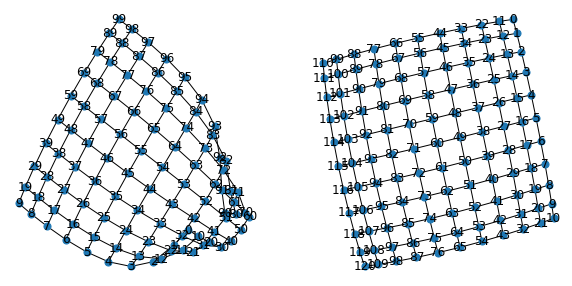

In [ ]:
# GRAPHS
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = remove_zero_adj(adj[env])
        
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

In [ ]:
# AGENT COVERAGE

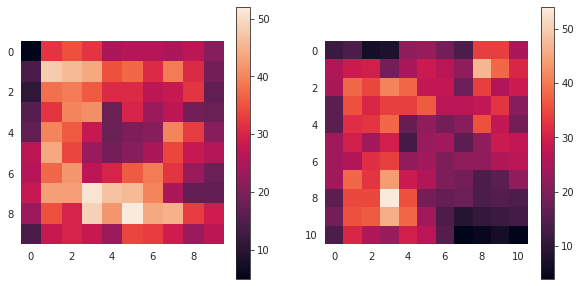

5.001 4.001


In [ ]:
plt.figure(figsize=(10,5))
for i, env in enumerate([env0, env1]):
    plt.subplot(1,2,i+1)
    cell_reshaped = reshape_cells(positions[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped)
    plt.colorbar()

plt.show()

print(min(positions[env0]), min(positions[env1]))

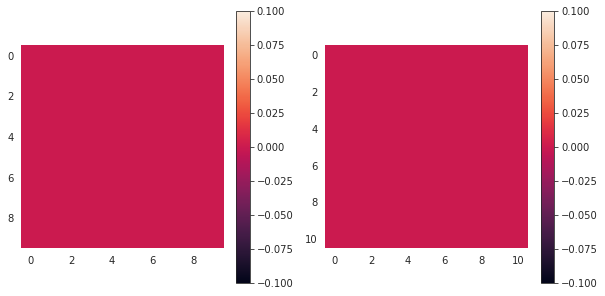

In [ ]:
# where the agent didnt go much shown in black
plt.figure(figsize=(10,5))

for i, env in enumerate([env0, env1]):
    a = positions[env] < 4
    plt.subplot(1,2,i+1)
    cell_reshaped = reshape_cells(a.astype(int), widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped)
    plt.colorbar()    
    
plt.show()

In [ ]:
# ACCURACY MAPS - SENSORY

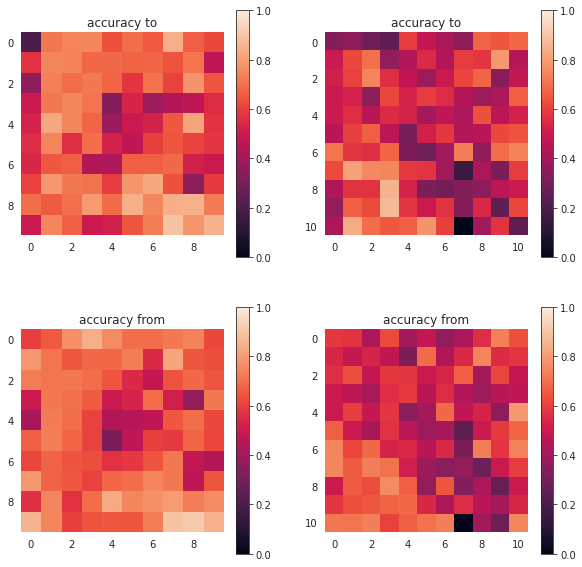

In [ ]:
plt.figure(figsize=(10,10))
for i, env in enumerate([env0, env1]):
    plt.subplot(2,2,i+1)
    cell_reshaped = reshape_cells(acc_s_t_to[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped,vmax=1,vmin=0)
    plt.title('accuracy to')

    plt.colorbar()
    plt.subplot(2,2,i+3)
    cell_reshaped = reshape_cells(acc_s_t_from[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped,vmax=1,vmin=0)
    plt.title('accuracy from')

    plt.colorbar()

plt.show()

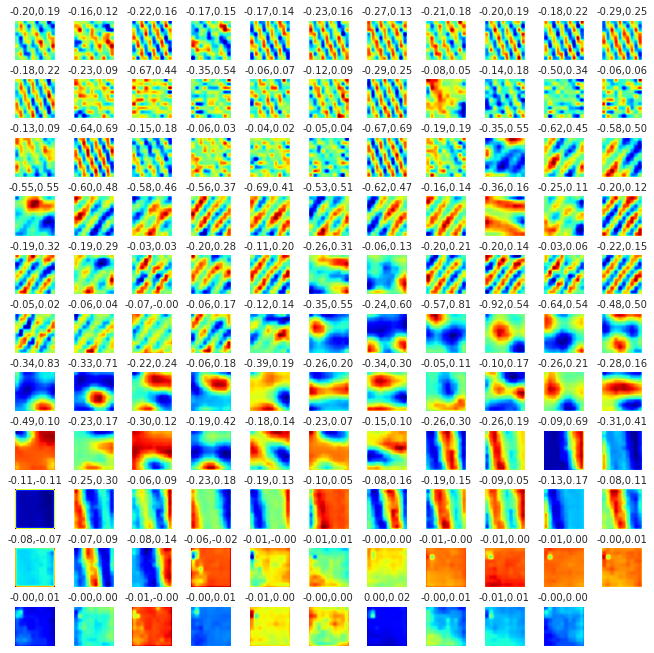

In [ ]:
# ENTORHINAL CELLS 
square_plot(g_all[env0], widths[batch_id[env0]], name='g0', maxmin=maxmin, shiny=shinys_[env0], \
            hexy=params['world_type'], lims=g_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env0])

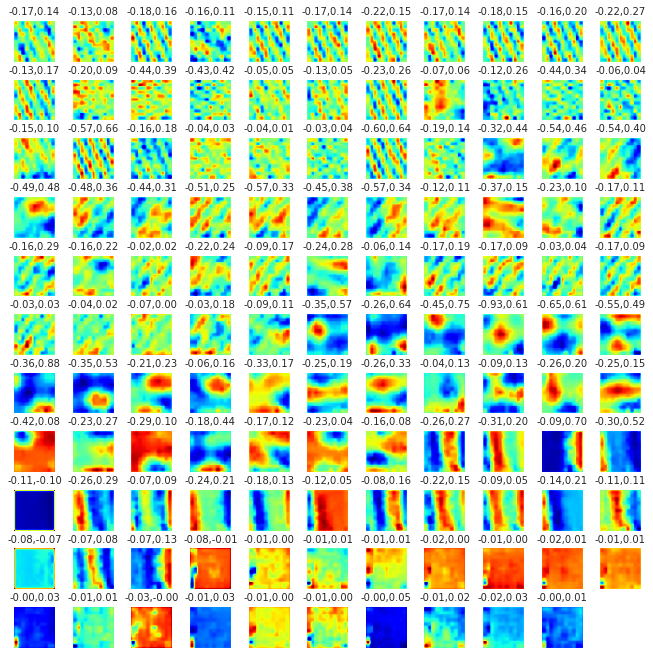

In [ ]:
square_plot(g_all[env1], widths[batch_id[env1]], name='g1', maxmin=maxmin, shiny=shinys_[env1], \
            hexy=params['world_type'], lims=g_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env1])

In [ ]:
# ENTORHINAL AUTOCORRELATIONS

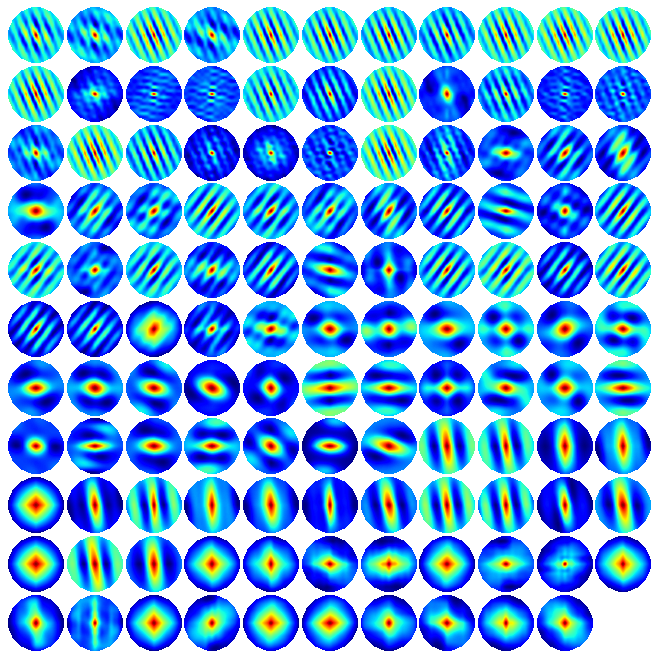

In [ ]:
square_autocorr_plot(g_all[env0], widths[batch_id[env0]], name='g0_auto', \
                     hexy=params['world_type'], mult=mult, smoothing=smoothing, cmap=cmap, circle=True)

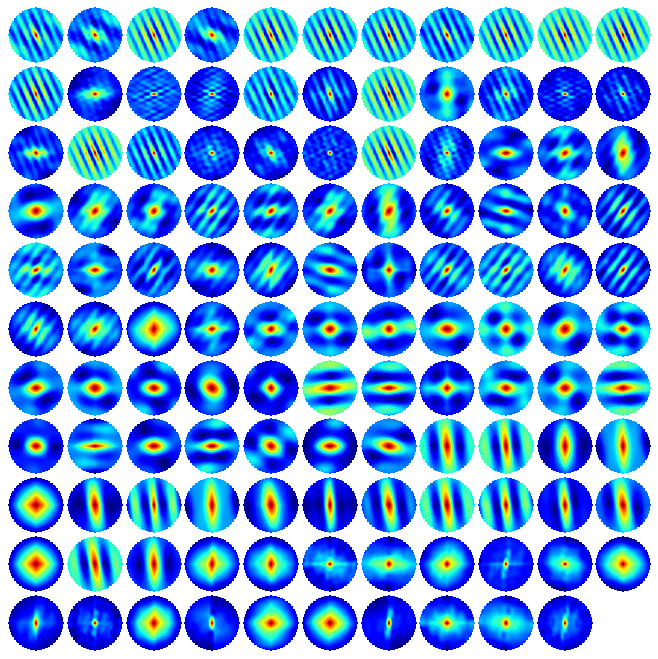

In [ ]:
square_autocorr_plot(g_all[env1], widths[batch_id[env1]], name='g1_auto', \
                     hexy=params['world_type'], mult=mult, smoothing=smoothing, cmap=cmap, circle=True)

In [ ]:
# HIPPOCAMPAL CELLS

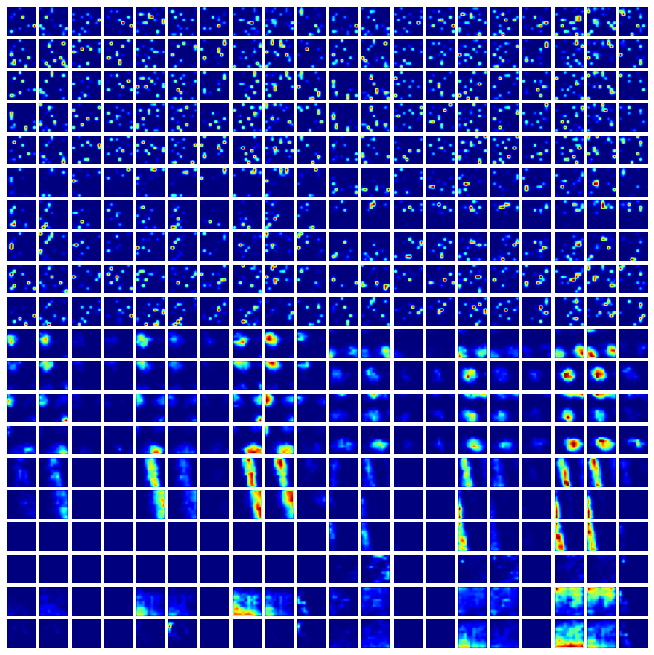

In [ ]:
square_plot(p_all[env0],widths[batch_id[env0]], name='p0', shiny=shinys_[env0],\
            hexy=params['world_type'], lims=p_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env0])

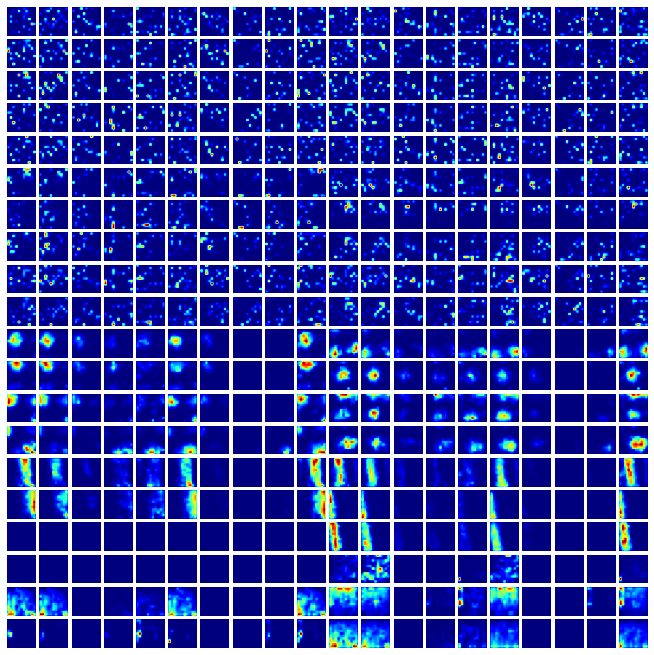

In [ ]:
square_plot(p_all[env1],widths[batch_id[env1]], name='p1', shiny=shinys_[env1], \
            hexy=params['world_type'], lims=p_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env1])

In [ ]:
"""
BEHAVIOURAL ANALYSES
"""

seaborn.set_style(style='white')

params['acc_simu'] = 1  # how accurate simulated node/edge agent is
recent = -1  # how far back into history of saved data
filt_size = 61  # smoothing window size (must be odd)
n = 10
fracs = [x /n for x in range(n+2)]  # for assessing accuracy within certain proportions of nodes visited

# for steps since visted analysis - assess accuracy within those steps
if params['world_type'] in ['family_tree', 'line_ti', 'tonegawa']:
    a_s = [0, 10, 20]
else:
    a_s = [0, 4, 10, 20, 40, 60, 100, 200, 300, 400, 600]

# Load data
positions_link, coos, env_info, distance_info = link_inferences(save_path, list_of_files, widths, batch_id, params,\
                                                                index=recent)
n_states, wids, n_available_states, n_available_edges = env_info

# Perform behavioural analayses. Partition results into environments of same size
allowed_widths = sorted(np.unique([widths[b_id] for b_id in batch_id]))
results = []
for allowed_wid in allowed_widths:
    p_cors, nodes_visited_all, edges_visited_all, time_vis_anal = \
        analyse_link_inference(allowed_wid, fracs, a_s, positions_link, coos, env_info, params)
    p_cors = [ind for ind in p_cors if len(ind)>0]
    results.append([p_cors, nodes_visited_all, edges_visited_all, time_vis_anal])

15320 8
batch 4 288, batch 8 288, batch 12 288, batch 13 287, batch 5 369, batch 9 368, batch 14 368, batch 15 366, batch 0 454, batch 1 458, batch 6 454, batch 10 456, batch 2 557, batch 3 552, batch 7 551, batch 11 550, 

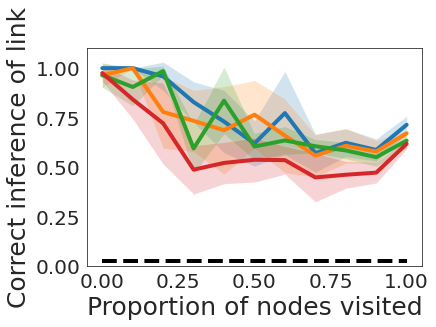

In [ ]:
# inferernce of untraversed link as a function proportion on nodes seen
plot_link_inference(results, allowed_widths, fracs, s_size)

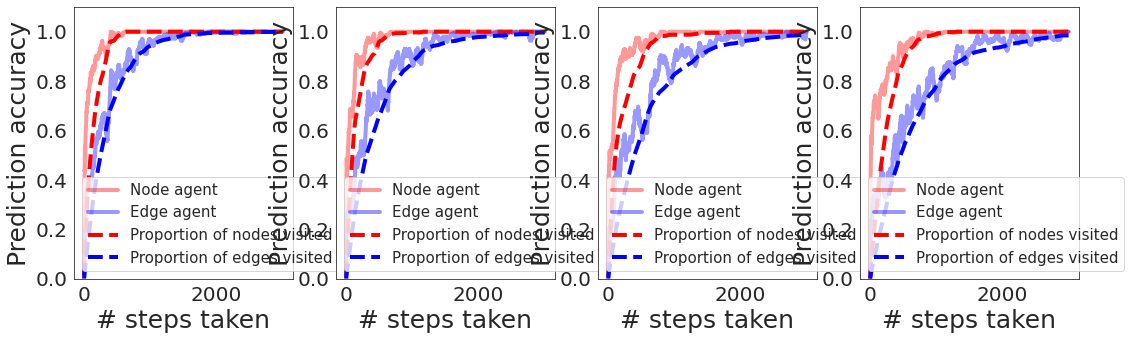

In [ ]:
# simulation of node and edge agent
plot_sim_corrects(results, allowed_widths, filt_size, wids, n_available_states, n_available_edges, params)

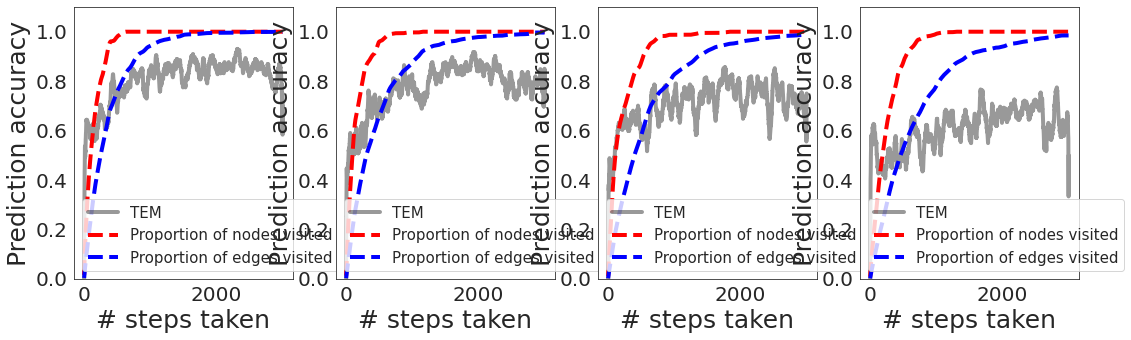

In [ ]:
# tem accuracy for each environment size
plot_acc_vs_sum_nodes_edges(results, allowed_widths, coos, filt_size, wids, n_available_states, n_available_edges)

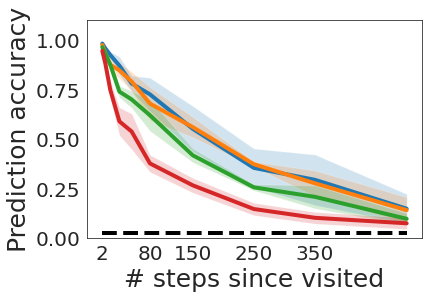

In [ ]:
# prediction accuracy after # steps since last time visited that node
plot_acc_vs_steps_since_visited(results, allowed_widths, a_s, s_size)

In [ ]:
# def link_inferences(save_path, list_of_files, widths, batch_id, params, index=-1):
#     list_of_files_2 = [x for x in list_of_files if 'positions_link' in x]
list_of_files_2 = [x for x in list_of_files if 'positions_link' in x]
list_of_files_3 = [int(x.split('.')[0].split('link')[-1]) for x in list_of_files_2]
list_of_files_3.sort()
index = str(list_of_files_3[-1])
index
    # list_of_files_3 = [int(x.split('.')[0].split('link')[-1]) for x in list_of_files_2]
    # list_of_files_3.sort()
    # index = str(list_of_files_3[index])

    # print(index, len(list_of_files_3))

    # positions_link = np.load(save_path + '/positions_link' + index + '.npy',allow_pickle=True)
    # corrects_link = np.load(save_path + '/correct_link' + index + '.npy',allow_pickle=True)
    # state_mat = np.load(save_path + '/state_mat_link' + index + '.npy',allow_pickle=True)
    # state_guess = np.load(save_path + '/state_guess_link' + index + '.npy',allow_pickle=True)
    # pos_dis = np.load(save_path + '/positions_link' + index + '.npy',allow_pickle=True)
    # adjs = np.load(save_path + '/adj_link' + index + '.npy',allow_pickle=True)

    # div = int(np.shape(corrects_link)[0] / np.shape(positions_link)[0])
    # coo = np.split(corrects_link, div, axis=0)
    # coos = np.concatenate(coo, 1)

    # wids = np.asarray(widths)[batch_id]

    # if params['world_type'] == 'family_tree':
    #     n_states = 2 ** (wids + 1) - 1
    # elif params['world_type'] == 'line_ti':
    #     n_states = wids
    # elif params['world_type'] == 'loop_laps':
    #     n_states = params['n_laps'] * (2 * wids + 2 * (wids - 1))
    # elif params['world_type'] == 'rectangle':
    #     n_states = wids * np.asarray(params['heights'])[batch_id]
    # else:
    #     n_states = wids**2

    # n_available_states = np.zeros_like(wids)
    # n_available_edges = np.zeros_like(wids)
    # for i, adj in enumerate(adjs):
    #     n_available_edges[i] = np.sum(np.sum(adj))
    #     n_available_states[i] = 0
    #     for j in range(len(adj)):
    #         if sum(adj[j, :]) > 0:
    #             n_available_states[i] += 1

    # env_info = [n_states, wids, n_available_states, n_available_edges]

    # return positions_link, coos, env_info, [state_mat, state_guess, pos_dis, adjs]

'15320'

In [ ]:
# HARLOW LIKE LEARNING CURVES

results_mega = []
coos_mega = []
allowed_widths = [9]
allowed_recents = [[1,2], [6, 7] ,[-1]]#, [18, 19,20, 21]]#, [-1]]  # for family_tree

#[[1,2], [7, 8, 9] , [11, 12, 13, 14], [18, 19,20, 21], [-3,-2,-1]]  # for family_tree
#[[1,2], [5, 6, 7, 8] , [9, 10, 11, 12, 13, 14], [50, 55, 60, 70], [-3,-2,-1]]  # for tran_inf

for hyper_recent in allowed_recents:
    results_ = []
    for recent in hyper_recent:
        print(hyper_recent)
        positions_link, coos, env_info, distance_info = link_inferences(save_path, list_of_files, widths, batch_id, \
                                                                        params, index=recent)

        n_states, wids, n_available_states, n_available_edges = env_info

        #results_ = []
        for allowed_wid in allowed_widths:
            nodes_visited_all, edges_visited_all, n_visited_means = [], [], []
            for i in range(params['batch_size']):
                if wids[i] == allowed_wid:
                    params['states'] = n_states[i]
                    params['n_available_states'] = n_available_states[i]
                    params['edges'] = n_available_edges[i]

                    node_visited, edge_visited, nodes, edges, num_visited, edge_stay_still = \
                        check_visited(positions_link[i].astype(int), params)
                    # all new links, but visited nodes!
                    n_visited_means.append(n_visited_correct(coos[i], num_visited, edge_visited))

            results_.append([n_visited_means])
    results_mega.append(results_)
    coos_mega.append(coos)


[1, 2]
3424 8


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[1, 2]
5502 8
[6, 7]
13424 8
[6, 7]
15320 8
[-1]
15320 8


21
20
31


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


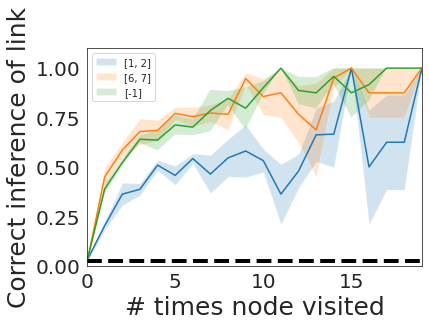

In [ ]:
import scipy as sp
f = plt.figure()

n_visits_lim = 20

smallest_min = 10000
for i, recent in enumerate(allowed_recents):    
    for res, wid in zip(results_mega[i], allowed_widths):
        pc = res[0]
        pc, smallest = sort_out_summin(pc)
        smallest_min = np.minimum(smallest, smallest_min)
    
        mean_pc = np.nanmean(pc, 0)
        std_pc = sp.stats.sem(pc, 0, nan_policy='omit')
        plt.plot(mean_pc)
        plt.fill_between(np.arange(smallest), mean_pc + std_pc, mean_pc - std_pc,
                         alpha=0.2, label=str(recent))

smallest_min = np.minimum(smallest_min, n_visits_lim)
plt.plot((0, smallest_min-1), (1/s_size, 1/s_size), 'k--', linewidth=linewidth)
plt.xlim(0, smallest_min-1)
plt.ylim(0, 1.1)
plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.tick_params(axis='both', which='minor', labelsize=labelsize)
plt.xlabel('# times node visited', fontsize=fontsize)
plt.ylabel('Correct inference of link', fontsize=fontsize)
plt.legend()
plt.show()